# Epidemiology vs. Literature-Based Comorbidity

This notebook supports the comparison between the epidemiological results reviewed by Keezer *et al.* in [Comorbidities of epilepsy: current concepts and future perspectives](https://www.ncbi.nlm.nih.gov/pubmed/26549780) and the literature-based genetic pleiotropy scores presented by Hoyt and Domingo-Fernández *et al.*

In [1]:
import itertools as itt
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
current_working_directory = os.getcwd() # Notebook abs path
resources_directory = os.path.join(current_working_directory, "resources")
results_directory = os.path.join(current_working_directory, "results")

# Load Data

## Load Epidemiological Findings

In [4]:
keezer_df_path = os.path.join(results_directory, 'keezer_table.tsv')
keezer_df = pd.read_csv(keezer_df_path, sep='\t')

Show the first few rows. The ones that haven't been annotated are left out.

In [5]:
keezer_df[keezer_df.Value.notna()].head()

,Condition,ICD Chapter,Reference,Value
0,Neoplasm,2,CHIS,11.1
1,Neoplasm,2,CHS 2005,1.4
2,Neoplasm,2,NHIS 2002,2.4
3,Neoplasm,2,NHIS 2010,11.3
4,Neoplasm,2,NPHS,1.2


## Load Literature-Based Gene Overlap Findings

In [6]:
gene_df_path = os.path.join(results_directory, 'gene_overlap_results.tsv')
gene_df = pd.read_csv(gene_df_path, sep='\t')

Show the first few rows

In [7]:
gene_df.head()

,Condition,MeSH ID,Reference Query,Associated documents,Disease-associated genes,Comorbidity-associated genes,Normalized pleitropy rate (%)
0,Epilepsy,D004827,"[MeSH Disease:""Epilepsy""]",192245,2901,-,-
1,Alzheimer's Disease,D000544,"[MeSH Disease:""Alzheimer Disease""]",109495,4968,396,13.65
2,Migraine,D008881,"[MeSH Disease:""Migraine Disorders""]",30928,1230,306,10.54
3,Parkinson's Disease,D010300,"[MeSH Disease:""Parkinson Disease""]",79103,3646,258,8.89
4,Hypertension,D006973,"[MeSH Disease:""Hypertension""]",391190,5574,252,8.68


#  Compare

In [8]:
keezer_slim_df = keezer_df[['Condition', 'Value']]
gene_slim_df = gene_df[['Condition', 'Normalized pleitropy rate (%)']]

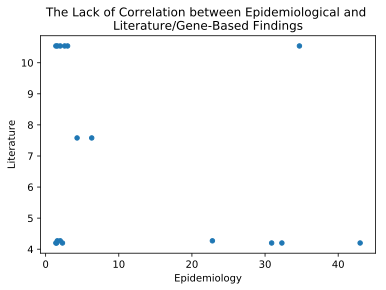

In [9]:
index, data = [], []

iterator = itt.product(keezer_slim_df.itertuples(), gene_slim_df.itertuples())

for (_, epidem_cond, epidem_val), (_, gene_cond, gene_val) in iterator:
    if epidem_cond == gene_cond and not pd.isnull(epidem_val):
        index.append(epidem_cond)
        data.append((float(epidem_val), float(gene_val)))

        
compare_df = pd.DataFrame(data, index=index, columns=['Epidemiology', 'Literature'])
compare_df.plot.scatter('Epidemiology', 'Literature')
plt.title('The Lack of Correlation between Epidemiological and \nLiterature/Gene-Based Findings')
plt.show()

# Conclusion

As Keezer *et al.* plotted in Figure 1 of their manuscript, comorbidities arise due one or many of causative mechanisms, resultant mechanisms, shared risk factors, and bidirectional effects. The deconvolution of these types of comorbidities are much more complicated than can be explained solely by literature-based gene co-occurrence as a proxy for genetic pleiotropy. As the figure above shows, there is little correlation to use this without much further investigation into the mechanisms in which those genes participate.